In [5]:
import Models.process as process
import Models.AIRD as AIRD

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

In [6]:
pathc = "../Data/Italian Data/"
#pathc="../Data/Covid Tracking State Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
#filename = "CA.csv"
dates, infectRaw, recovRaw, deadRaw = process.loadData(pathc + filename)

#recovRaw = process.getRecov(infectRaw, deadRaw)
#infectRaw = process.getCurrentInfect(infectRaw, recovRaw, deadRaw)

pop = 60000000

In [7]:
modelAIRD = AIRD.AIRD() #model class

modelAIRD.setInfections(infectRaw, pop)

I(0), A(0): 0.0 1e-06
q: 0.39668768663680853
gamma: [0.09944404 0.00903529]
kappa: 0.3282692168703827
beta: [2.97609914e-01 2.66880113e-01 4.73899886e+02 3.80986344e+00]



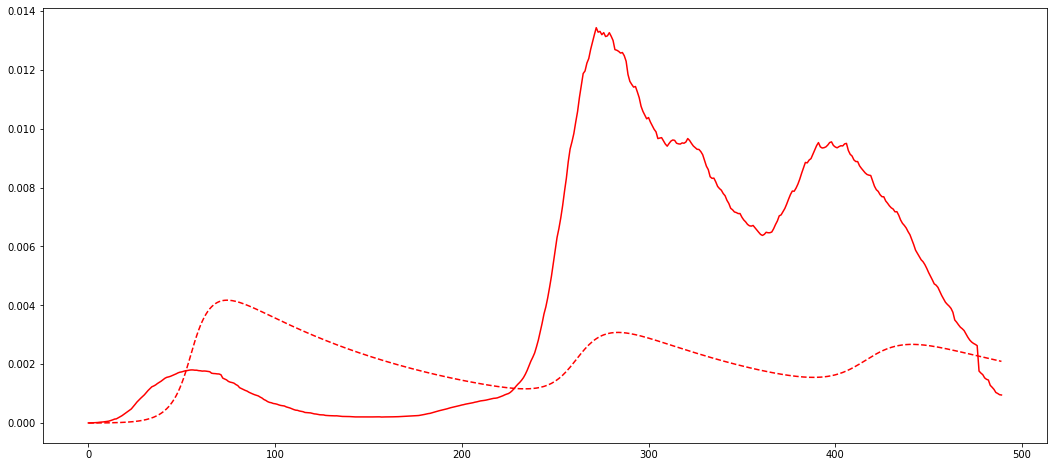

In [18]:
modelAIRD.solveVars(eta=.005, printOut=0)
modelAIRD.graph()

modelAIRD.printTheta(modelAIRD.theta)

(<Figure size 1296x576 with 1 Axes>, <AxesSubplot:>)

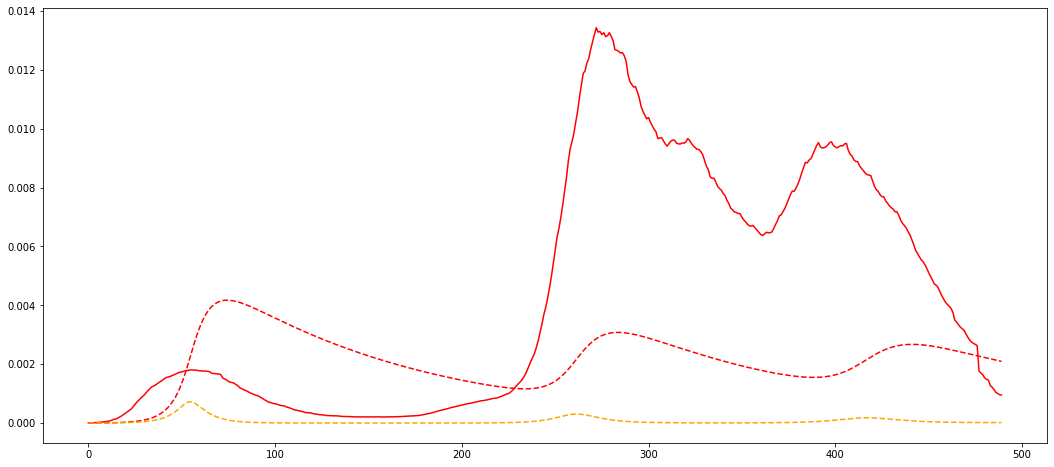

In [19]:
modelAIRD.graph(graphA=True)

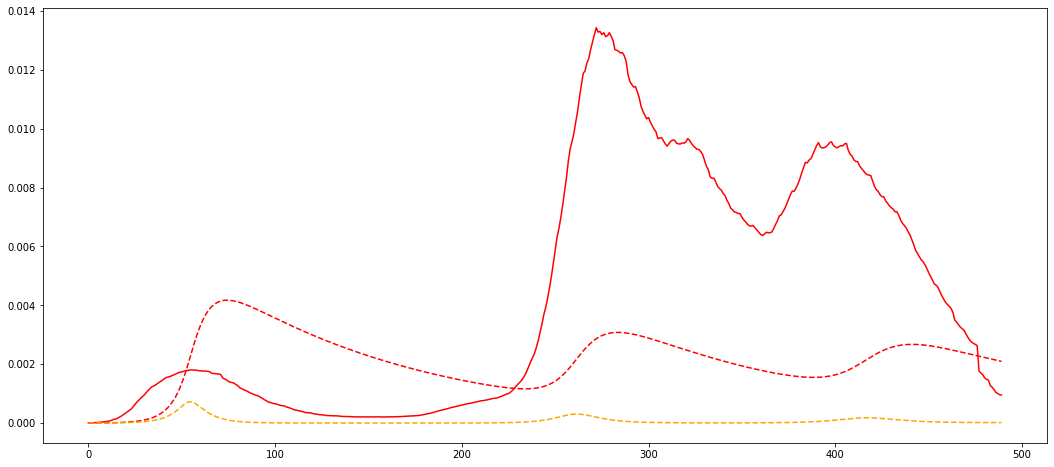

In [53]:
I = np.zeros(np.shape(modelAIRD.actualI))
A = np.zeros(np.shape(modelAIRD.actualI))

I[0] = modelAIRD.theta[0] # I(0)
A[0] = modelAIRD.theta[1] # A(0)
q = modelAIRD.theta[2]
gamma0 = modelAIRD.theta[3] #.009
#gamma0 = 0
gamma1 = modelAIRD.theta[4]
kappa = modelAIRD.theta[5] #.32
#kappa = .02
beta = modelAIRD.theta[6:] #beta0, beta1, beta2, beta3

#iterate the arrays using the definition A' and I'
for t in range(len(I)-1): #define I and A on range [1, length)
    diffA = (beta[0] + (beta[1] / (1 + (beta[2]*I[t])**beta[3] )) ) * (q*A[t])/(q + A[t]) - kappa*A[t] - gamma0*A[t]
    diffI = kappa*A[t] - gamma1*I[t]

    #print(diffA, diffI, A[t], I[t])
    A[t+1] = diffA + A[t]
    I[t+1] = diffI + I[t]
    
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectRaw/pop, color="red")
ax.plot(I, color="red", linestyle="dashed")
ax.plot(A, color="orange", linestyle="dashed")

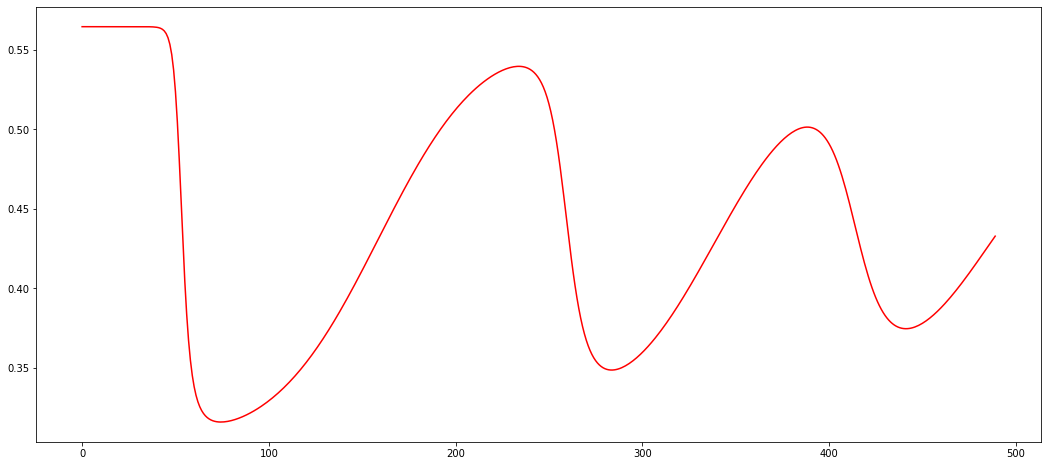

In [54]:
fig2,ax2 = plt.subplots(figsize=(18,8))
ax2.plot(beta[0] + (beta[1] / (1 + (beta[2]*I)**beta[3] )), color = "red")